<a href="https://colab.research.google.com/github/farazzashraf/LGMVIP--DataScience/blob/main/Exploratory_Data_Analysis_on_Dataset_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis on Dataset - Terrorism

In [72]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Loading the dataset
data = pd.read_csv("global terrorism.csv", encoding='latin-1')

<ipython-input-73-49bd76268a85>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("global terrorism.csv", encoding='latin-1')


In [74]:
# Exploring the dataset
print(data.head())
print(data.info())
print(data.describe())

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

In [75]:
# Checking and handling the missing values
data.isnull().sum()
data.fillna(0, inplace=True)

In [76]:
plt.style.use('seaborn-v0_8-whitegrid')

In [77]:
# Limiting the data to a specific subset of countries and years
selected_countries = ['United States', 'Japan', 'Iran']
selected_years = [1970, 1980]

filtered_data = data[data['country_txt'].isin(selected_countries) &
                     data['iyear'].between(selected_years[0], selected_years[-1])]

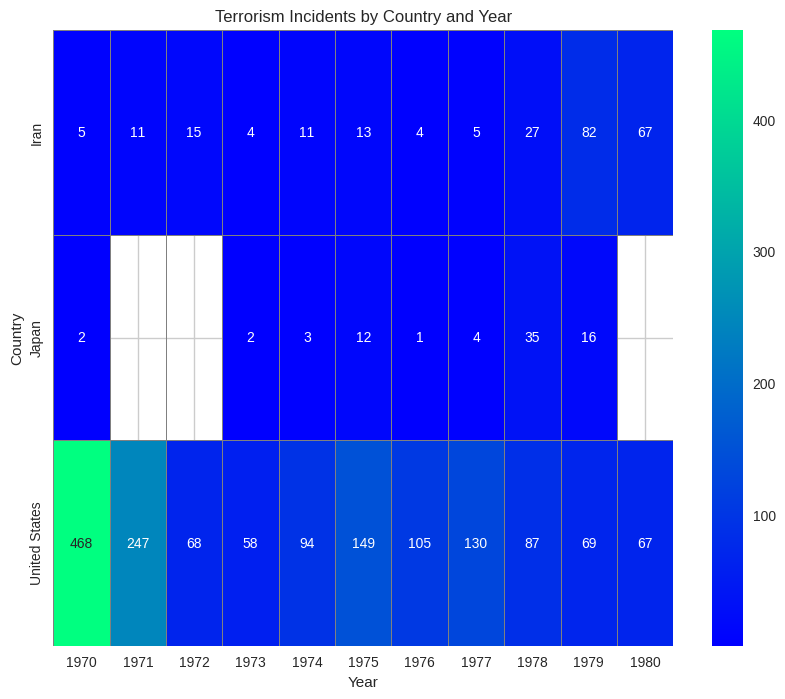

In [78]:
# Plotting a heatmap of terrorism incidents by country and year
plt.figure(figsize=(10, 8))
heatmap_data = filtered_data.pivot_table(index='country_txt', columns='iyear', values='eventid', aggfunc='count')
sns.heatmap(heatmap_data, cmap='winter', linewidths=0.5, linecolor='grey', annot=True, fmt='g')
plt.title('Terrorism Incidents by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()

In [92]:
# Limiting the data to a specific subset of countries and years
selected_countries2 = ['India', 'Pakistan', 'Afghanistan']
selected_years2 = [2000, 2010]

filtered_data2 = data[data['country_txt'].isin(selected_countries2) &
                     data['iyear'].between(selected_years2[0], selected_years2[-1])]

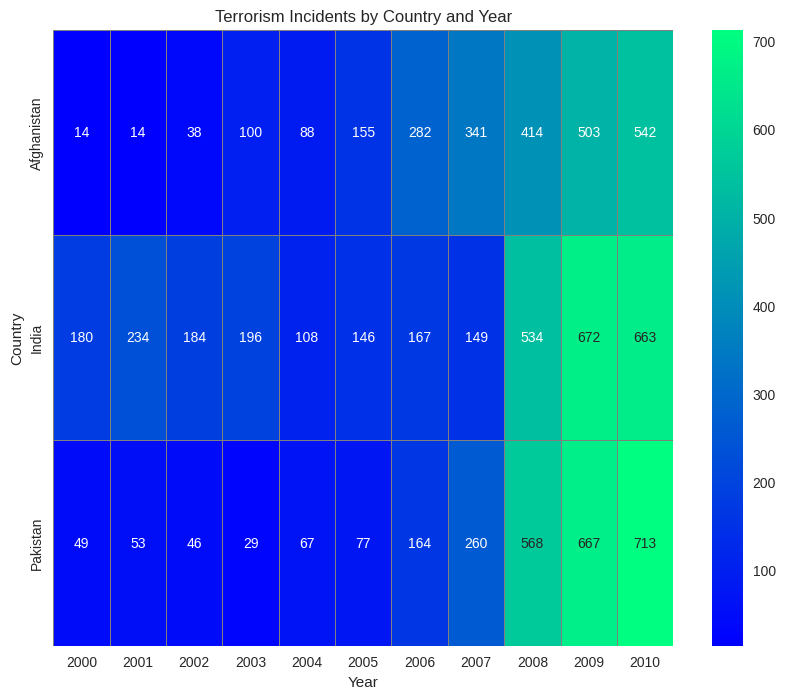

In [93]:
# Plotting a heatmap of terrorism incidents by country and year
plt.figure(figsize=(10, 8))
heatmap_data2 = filtered_data2.pivot_table(index='country_txt', columns='iyear', values='eventid', aggfunc='count')
sns.heatmap(heatmap_data2, cmap='winter', linewidths=0.5, linecolor='grey', annot=True, fmt='g')
plt.title('Terrorism Incidents by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()

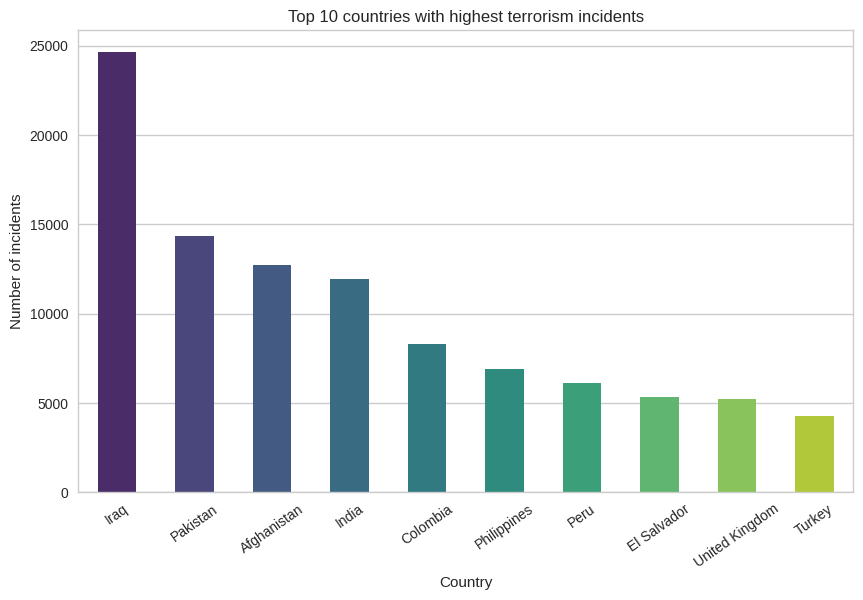

In [80]:
# Creating bar chart to show the top 10 countries with the highest number of terrorism incidents
top_countries = data['country_txt'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis', width=0.5)
plt.title("Top 10 countries with highest terrorism incidents")
plt.xlabel('Country')
plt.ylabel('Number of incidents')
plt.xticks(rotation=35)
plt.show()

In [81]:
had_incident = data['country_txt'].str.contains('India', case=False).any()
if had_incident:
  print("India had incidents")
else:
  print("India had no incidents")

India had incidents


In [82]:
# Checking how many incidents India had
india_incidents = data[data['country_txt'].str.contains('India', case=False, na=False)]['eventid'].count()
india_incidents

11960

In [83]:
years_with_incidents = data[data['eventid'].notnull()]['iyear'].unique()
years_with_incidents

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

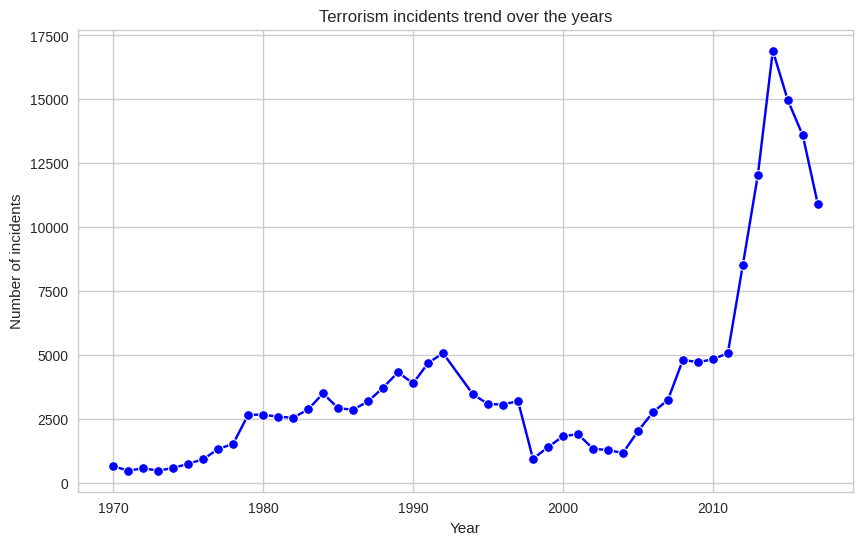

In [88]:
# Time series line plot to show the trend of terrorism incidents over the years
min_year = data['iyear'].min()
max_year = data['iyear'].max()

start_year = min_year
end_year = max_year

incidents_in_range_of_years = data[(data['iyear'] >= start_year) & (data['iyear'] <= end_year)]

incidents_by_year = incidents_in_range_of_years.groupby('iyear')['eventid'].count()
plt.figure(figsize=(10, 6))
sns.lineplot(x=incidents_by_year.index, y=incidents_by_year.values, marker='o', color='b')
plt.title('Terrorism incidents trend over the years')
plt.xlabel('Year')
plt.ylabel('Number of incidents')
plt.show()

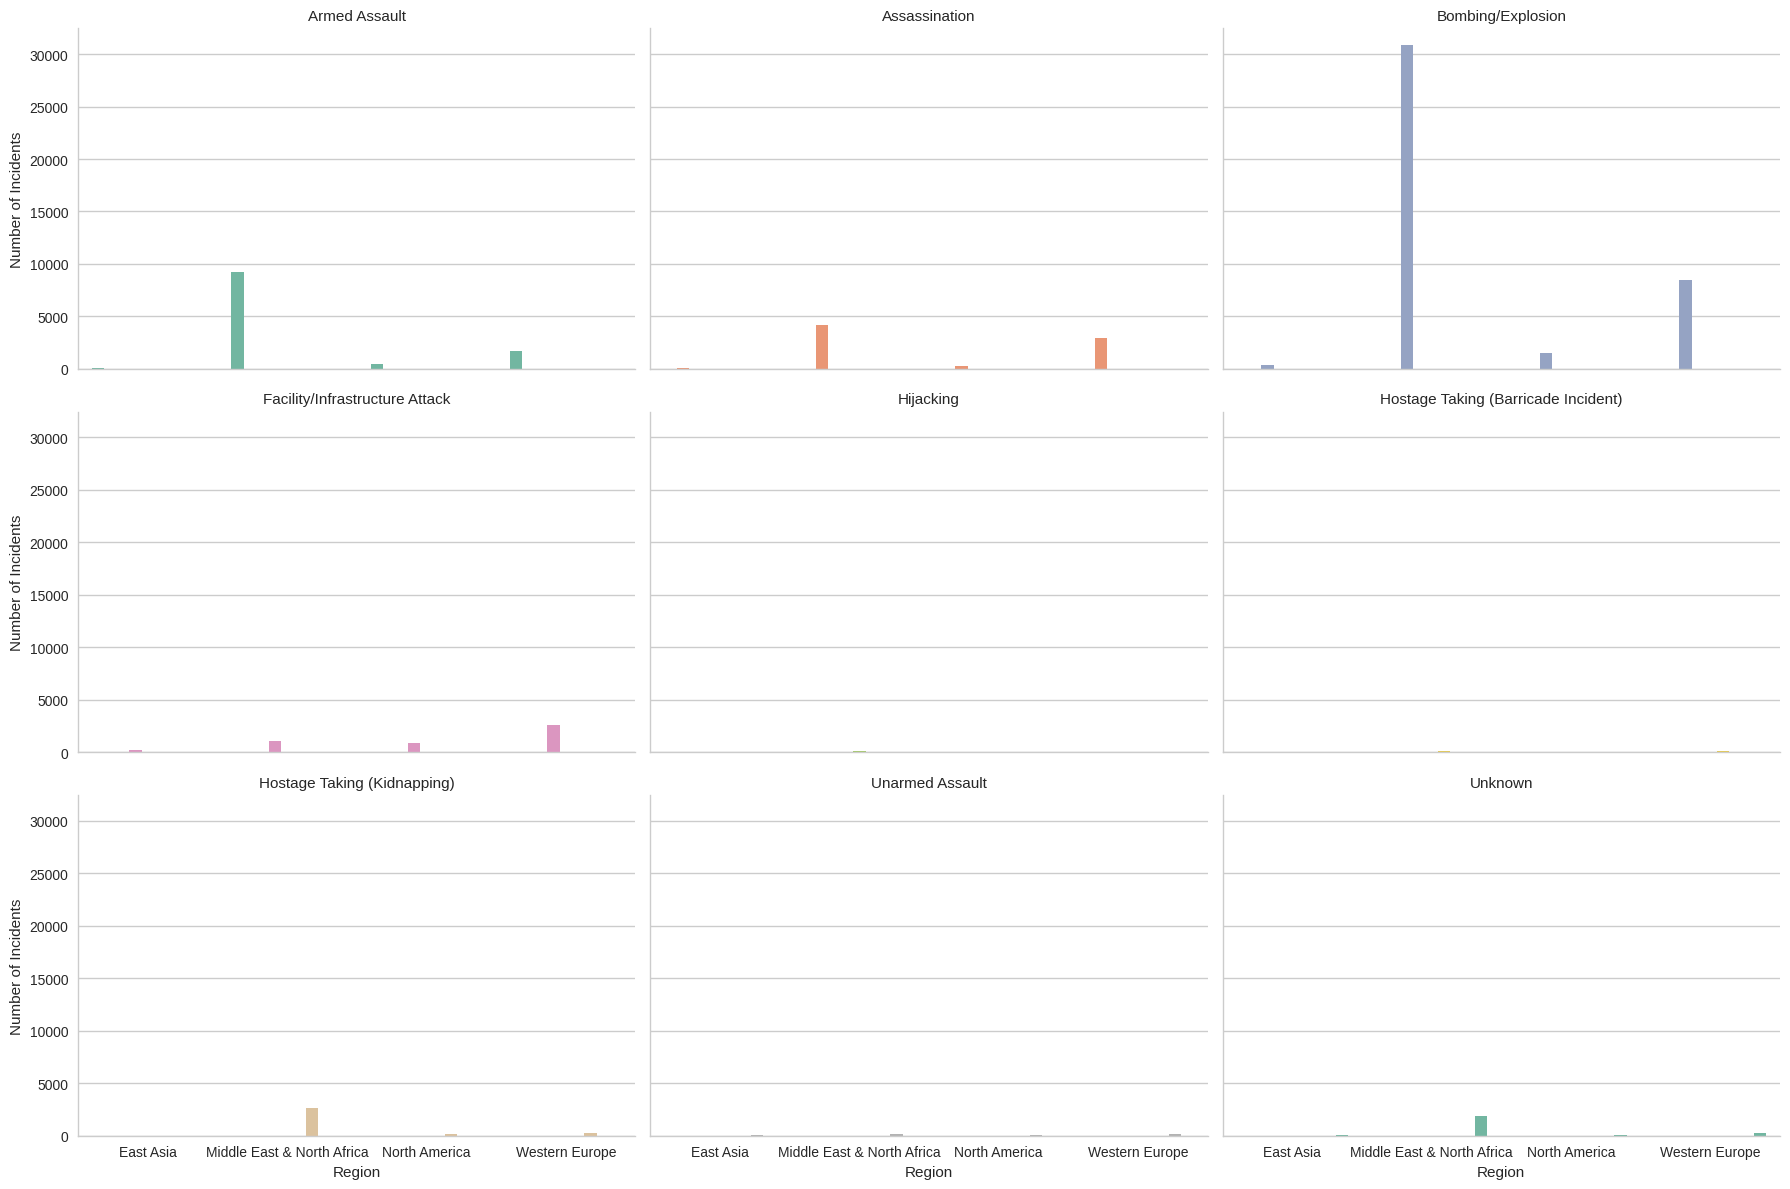

In [134]:
needed_region = ['Middle East & North Africa', 'North America', 'East Asia', 'Western Europe']
terrorism_types_by_region = data.groupby(['region_txt', 'attacktype1_txt'])['eventid'].count().reset_index()
terrorism_types_by_region = terrorism_types_by_region[terrorism_types_by_region['region_txt'].isin(needed_region)]

# Creating a FacetGrid with seaborn
g = sns.catplot(x='region_txt', y='eventid', hue='attacktype1_txt', kind='bar', col='attacktype1_txt',
                col_wrap=3, data=terrorism_types_by_region, palette='Set2', height=4, aspect=1.5, facet_kws={'sharey': False})

# Plotting bar charts for each terrorism type in the FacetGrid
g.set_axis_labels('Region', 'Number of Incidents')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

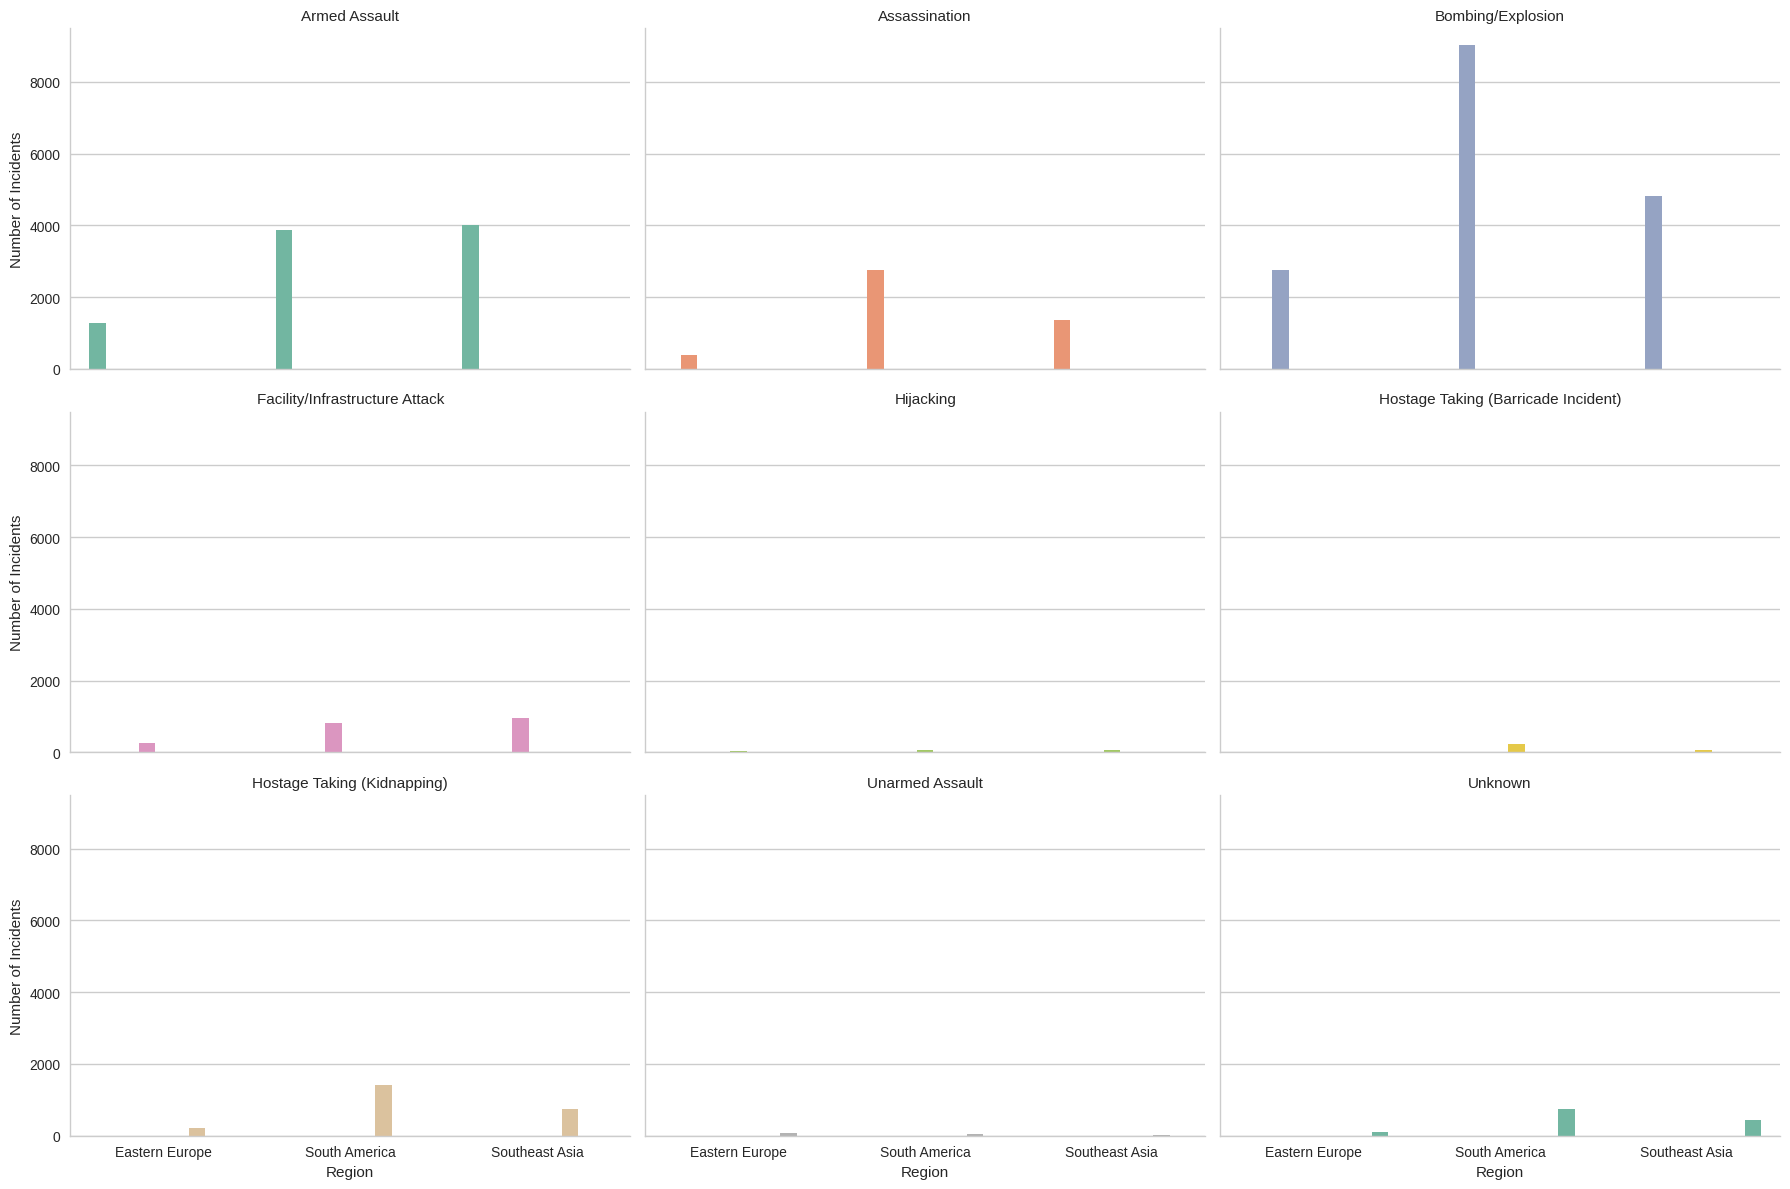

In [135]:
needed_region = ['South America', 'Eastern Europe', 'Southeast Asia']
terrorism_types_by_region = data.groupby(['region_txt', 'attacktype1_txt'])['eventid'].count().reset_index()
terrorism_types_by_region = terrorism_types_by_region[terrorism_types_by_region['region_txt'].isin(needed_region)]

# Creating a FacetGrid with seaborn
g = sns.catplot(x='region_txt', y='eventid', hue='attacktype1_txt', kind='bar', col='attacktype1_txt',
                col_wrap=3, data=terrorism_types_by_region, palette='Set2', height=4, aspect=1.5, facet_kws={'sharey': False})

# Plotting bar charts for each terrorism type in the FacetGrid
g.set_axis_labels('Region', 'Number of Incidents')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

In [146]:
# Grouping the data by country and region and calculating the success rate
attack_counts = data.groupby(['region_txt', 'country_txt'])['eventid'].count()
success_counts = data[data['success'] == 1].groupby(['region_txt', 'country_txt'])['eventid'].count()

# Calculating the success rate as the ratio of successful attacks to total attacks
success_rate = (success_counts / attack_counts).reset_index()
success_rate.rename(columns={'eventid': 'success_rate'}, inplace=True)

sorted_success_rate =success_rate.sort_values(by='success_rate', ascending=False)

highest_success_rate = sorted_success_rate.head(5)
lowest_success_rate = sorted_success_rate.tail(5)

print("Highest Success Rate")
print(highest_success_rate)

Highest Success Rate
                      region_txt          country_txt  success_rate
191               Western Europe              Iceland           1.0
28   Central America & Caribbean  St. Kitts and Nevis           1.0
143           Sub-Saharan Africa             Djibouti           1.0
75    Middle East & North Africa        International           1.0
144           Sub-Saharan Africa    Equatorial Guinea           1.0
Lowest Success Rate
             region_txt   country_txt  success_rate
192      Western Europe       Ireland      0.452769
148  Sub-Saharan Africa        Gambia      0.333333
117          South Asia     Mauritius           NaN
121      Southeast Asia        Brunei           NaN
203      Western Europe  Vatican City           NaN


In [147]:
print("Lowest Success Rate")
print(lowest_success_rate)

Lowest Success Rate
             region_txt   country_txt  success_rate
192      Western Europe       Ireland      0.452769
148  Sub-Saharan Africa        Gambia      0.333333
117          South Asia     Mauritius           NaN
121      Southeast Asia        Brunei           NaN
203      Western Europe  Vatican City           NaN


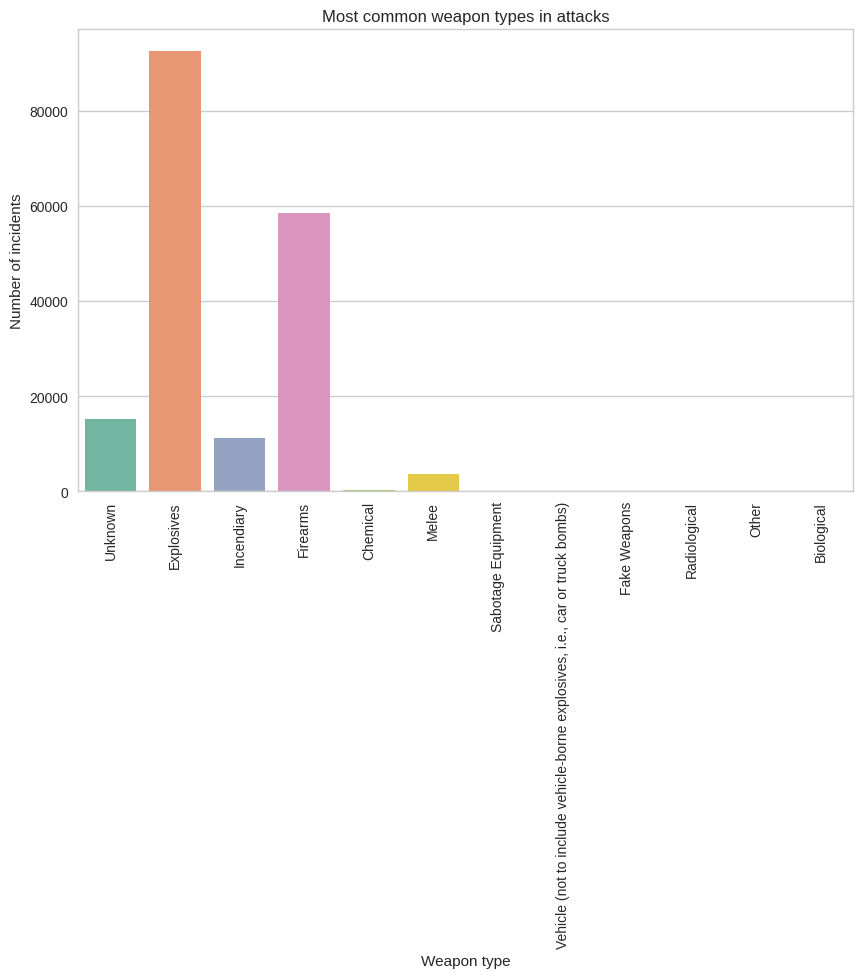

In [151]:
# Bar chart to show the most common weapon types used in attacks
plt.figure(figsize=(10, 6))
sns.countplot(x='weaptype1_txt', data=data, palette="Set2")
plt.title('Most common weapon types in attacks')
plt.xlabel('Weapon type')
plt.ylabel("Number of incidents")
plt.xticks(rotation=90)
plt.show()

In [152]:
# Calculating total number of people killed in terrorist incidents
total_people_killed = data['nkill'].sum()
print("Total number of people killed in terrorist incident: ", total_people_killed)

Total number of people killed in terrorist incident:  411868.0


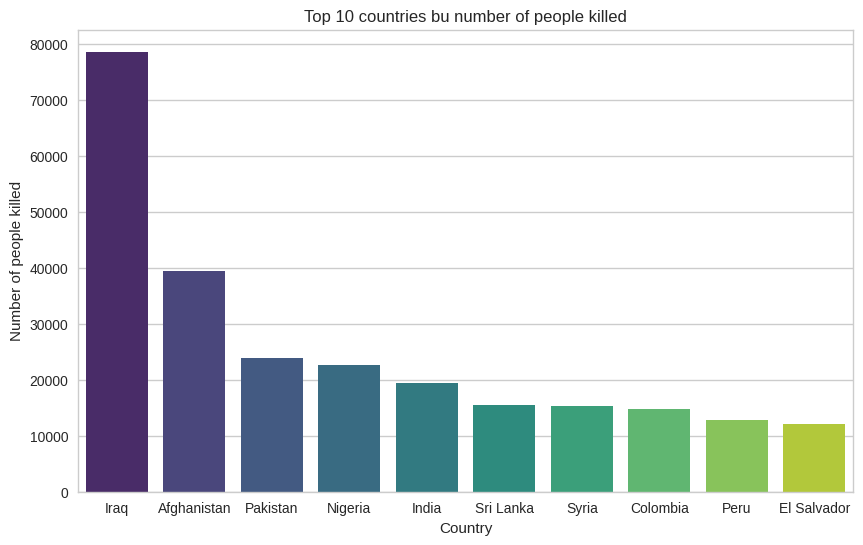

In [154]:
# Analyzing number of people killed by country
people_killed_by_country = data.groupby('country_txt')['nkill'].sum().reset_index()

top_countries_killed = people_killed_by_country.nlargest(10, 'nkill')
plt.figure(figsize=(10, 6))
sns.barplot(x='country_txt', y='nkill', data=top_countries_killed, palette='viridis')
plt.title("Top 10 countries bu number of people killed")
plt.xlabel('Country')
plt.ylabel('Number of people killed')
plt.show()

In [156]:
data['region_txt'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)